# widget

In [5]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
@interact
def resize(image, scale=1.0):
    w, h = image.shape[0:2]
    nw, nh = int(w*scale), int(h*scale)
    img = cv2.resize(image, (nw, nh))
    return img

In [8]:
widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

FloatSlider(value=7.5, continuous_update=False, description='Test:', max=10.0, readout_format='.1f')

## interact

In [10]:
def func1(x):
    return 5*x

interact(func1, x=2.2);

interactive(children=(FloatSlider(value=2.2, description='x', max=6.6000000000000005, min=-2.2), Output()), _d…

## fixed

fixed() to Prevent Widgets from Getting Created

In [11]:
def func2(a,b,c):
    return (a*b) + c

interact(func2, a=5, b=5, c=widgetfixed(10));

NameError: name 'widgetfixed' is not defined

## selector

In [12]:
interact(func1, x=['good ','bad ']);

interactive(children=(Dropdown(description='x', options=('good ', 'bad '), value='good '), Output()), _dom_cla…

In [13]:
interact(func1, x=[('first', 100), ('second', 200)]);

interactive(children=(Dropdown(description='x', options=(('first', 100), ('second', 200)), value=100), Output(…

## 获取interact值

In [33]:
int_slider = widgets.IntSlider(min=10, max=50, value=25, step=2, description="Integer Slider")
int_slider
int_slider.value
int_slider.keys

IntSlider(value=25, description='Integer Slider', max=50, min=10, step=2)

25

['_dom_classes',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_view_count',
 '_view_module',
 '_view_module_version',
 '_view_name',
 'continuous_update',
 'description',
 'description_tooltip',
 'disabled',
 'layout',
 'max',
 'min',
 'orientation',
 'readout',
 'readout_format',
 'step',
 'style',
 'value']

In [30]:
float_slider = widgets.FloatSlider(min=10.0, max=50.0, value=25.0, step=2.5, description="Float Slider")
float_slider
float_slider.value

FloatSlider(value=25.0, description='Float Slider', max=50.0, min=10.0, step=2.5)

25.0

## check box

In [34]:
widgets.Checkbox(value=True, description="Check")

Checkbox(value=True, description='Check')

## button

In [41]:
button = widgets.Button(description="Check")

## Dropdown

In [36]:
widgets.Dropdown(options=["A","B","C","D"], description="Select Right Option")

Dropdown(description='Select Right Option', options=('A', 'B', 'C', 'D'), value='A')

## Textarea

In [37]:
widgets.Textarea(value="Please enter text here..")

Textarea(value='Please enter text here..')

## XXX

We can pass the above-created widgets as a parameter value to interact() and it'll use those widgets instead of creating widgets by itself. We can prevent the default behavior of interact() function this way and force it to use our designed widgets according to our needs.

In [43]:
interact(func1, x= widgets.IntSlider(min=10, max=50, value=25, step=2, description="Integer Slider"));

interactive(children=(IntSlider(value=25, description='Integer Slider', max=50, min=10, step=2), Output()), _d…

In [44]:
interact(func1, x= widgets.FloatSlider(min=10.0, max=50.0, value=25.0, step=2.5, description="Float Slider"));

interactive(children=(FloatSlider(value=25.0, description='Float Slider', max=50.0, min=10.0, step=2.5), Outpu…

## interactive

In [46]:
from IPython.display import display

def func3(a,b,c):
    display((a+b)^c)

w = widgets.interactive(func3,  a=widgets.IntSlider(min=10, max=50, value=25, step=2),
                        b=widgets.IntSlider(min=10, max=50, value=25, step=2),
                        c=widgets.IntSlider(min=10, max=50, value=25, step=2),
                       )
display(w)

interactive(children=(IntSlider(value=25, description='a', max=50, min=10, step=2), IntSlider(value=25, descri…

In [47]:
w.children

(IntSlider(value=38, description='a', max=50, min=10, step=2),
 IntSlider(value=38, description='b', max=50, min=10, step=2),
 IntSlider(value=42, description='c', max=50, min=10, step=2),
 Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '102'}, 'metadata': {}},)))

In [48]:
w.kwargs

{'a': 38, 'b': 38, 'c': 42}

In [51]:
import matplotlib.pyplot as plt
import numpy as np

def plot(m,c):
    x = np.random.rand(10)
    y = m *x + c
    plt.plot(x,y)
    plt.show()

widgets.interactive(plot, m=(-10,10, 0.5), c=(-5,5,0.5))

interactive(children=(FloatSlider(value=0.0, description='m', max=10.0, min=-10.0, step=0.5), FloatSlider(valu…

## interactive_output

interactive_output lets us layout widgets according to our need. interactive_output does not generate output UI but it lets us create UI, organize them in a box and pass them to it. This gives us more control over the layout of widgets.

In [52]:
m = widgets.FloatSlider(min=-5,max=5,step=0.5, description="Slope")
c = widgets.FloatSlider(min=-5,max=5,step=0.5, description="Intercept")

# An HBox lays out its children horizontally
ui = widgets.HBox([m, c])

def plot(m, c):
    x = np.random.rand(10)
    y = m *x + c
    plt.plot(x,y)
    plt.show()

out = widgets.interactive_output(plot, {'m': m, 'c': c})

display(out, ui)

Output()

The interactive object is of type VBox which is a container object of ipywidgets. VBox can layout various widgets according to vertical layout. We can access its children as well as arguments.

In [64]:
x = np.array([1,2,3,4,5,6,7,8])
def myfunc(a,b,c):
    y = (x-1)**2+2
    plt.scatter(x,y,c='k',lw=3,s=60)
    r = (x-a)**b+c
    cost = np.sum(r-y)
    plt.plot(x,r,c='yellow')
    plt.scatter(0,cost,c='blue')
    plt.show()
    return r

myy = widgets.interactive(myfunc,a=(-5,5,0.5),b=[1,2,3,4,5],c=(-4,4,0.5))
display(myy)

interactive(children=(FloatSlider(value=0.0, description='a', max=5.0, min=-5.0, step=0.5), Dropdown(descripti…

In [5]:
import cufflinks as cf
from pandas import dataframe as df

@interact
def scatter_plot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[1:],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    df.iplot(kind='scatter', x=x, y=y, mode='markers', 
             xTitle=x.title(), yTitle=y.title(), 
             text='title',
             title=f'{y.title()} vs {x.title()}',
             theme=theme, colorscale=colorscale)

ImportError: cannot import name 'dataframe' from 'pandas' (/home/jiangxing/anaconda3/envs/train/lib/python3.9/site-packages/pandas/__init__.py)

In [38]:
interact(func1, x= widgets.IntSlider(min=10, max=50, value=25, step=2, description="Integer Slider"));

interactive(children=(IntSlider(value=25, description='Integer Slider', max=50, min=10, step=2), Output()), _d…

In [15]:
from IPython.display import display

def func3(a,b,c):
    display((a+b)^c)

w = interactive(func3,  a=widgets.IntSlider(min=10, max=50, value=25, step=2),
                        b=widgets.IntSlider(min=10, max=50, value=25, step=2),
                        c=widgets.IntSlider(min=10, max=50, value=25, step=2),
                       )
display(w)

NameError: name 'interactive' is not defined

(-5.0, 5.0)

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

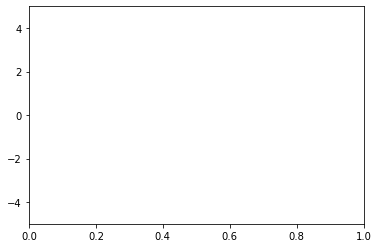

In [22]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.set_ylim(-5, 5)


def f(m, b):
    global ax
    plt.sca(ax)
    ax.cla()
    x = np.linspace(-10, 10, num=100)
    ax.plot(x, m * x + b)
    # fig.canvas.draw()
    plt.show()


interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

In [5]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

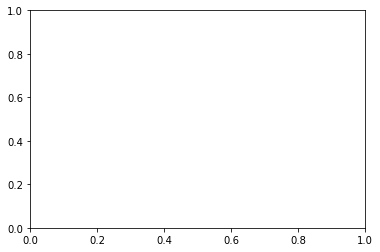

In [37]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
# fig, axes = plt.subplots(nrows=1, ncols=1)
# fig, axes = plt.subplots()
fig = plt.gcf()
axes = fig.add_subplot()


def f(m, b):
    global axes
    plt.sca(axes)  # ******** 如果不进行选择画在哪个axis上，则不能显示话出来的内容 ********
    axes.clear()  # 如果去掉，则在原图上一直累加显示
    x = np.linspace(-10, 10, num=1000)
    axes.plot(x, m * x + b)
    axes.set_ylim(-5, 5)
    # plt.show()  # 要不要都没关系
    # fig.canvas.draw()  # 要不要都没关系


interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
# output = interactive_plot.children[-1]
# output.layout.height = '350px'
interactive_plot